<a href= "http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml">
    <img src ="../data/NY_Taxi.png" height = "300px" width = "300px" align="right"/>
</a>
# <center> Exploratory Data Analysis on Green Taxis </center>


This notebook is an analysis on the data collected by the New York City Taxi and Limousine commission about <strong> "Green" </strong> Taxis. Green Taxis (as opposed to yellow ones) are taxis that are not allowed to pick up passengers inside of the densely populated areas of Manhattan

The analysis is on the September 2015 dataset. Link to download dataset can be found [here](https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv)

Let's start the analysis by importing the necessary python modules for assitance.

## Importing libraries for analysis

<strong>Note: </strong> Be sure to install these python libraries before importing from PyPI using pip. General command for downloading and installing 'requests' library (for e.g) would be:

```shell
$ pip install requests
```

In [22]:
import requests # required to download csv file from the URL
import pandas as pd # used for data analysis
from six.moves.urllib.request import urlretrieve # used for csv file download
import os # to check for already existing file on the disk
import matplotlib.pyplot as plt # used for plotting histograms and graph

## Global Variables

Defining some global variables to be used in the code. This technique of centralized decleration for all the variables provides the flexibility of code modulation in future

In [48]:
CSV_DATA_URL = "https://s3.amazonaws.com/nyc-tlc/trip+data/green_tripdata_2015-09.csv"
DEST_FILENAME = "../data/green.csv"
X_LABEL_HIST = "Distance covered by Green Taxis"    
Y_LABEL_HIST = "Number of Trips"
TITLE_HIST   = "Histogram of Trip_distance by Green Taxis"

## Downloading the data

Downloading the file from the amazon S3. Be sure to check for working internet connection before running the below cell.

In [33]:
def downloadData(CSV_DATA_URL, DEST_FILENAME):
    """
    Function to download the file from the internet and save on to the disk
    
    :param CSV_DATA_URL  : URL of CSV file we want to download
    :param dest_filename : Destination path to save the downloaded file on to disk
    :return              : None
    """
    if not os.path.exists(DEST_FILENAME):
        print ("Downloading file. . .")
        filename, _ = urlretrieve(CSV_DATA_URL, DEST_FILENAME)
        print ("Download Complete. File at {0}".format(DEST_FILENAME))
    else: 
        print ("File already present at {0}".format(DEST_FILENAME))

# calling the downloadData function
downloadData(CSV_DATA_URL, DEST_FILENAME)

# Reading csv file into pandas dataFrame
df = pd.read_csv(DEST_FILENAME)
print ("\nSample of the data : ")
df.head()

File already present at ../data/green.csv

Sample of the data : 


,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2.0
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2.0
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1.0
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1.0


After having loaded the csv file on to memory as pandas dataframe, let us proceed to further analysis of the dataset

## 1) No. of rows and columns in the dataset

In [20]:
print ("Dataset contains : {0} number of rows and {1} number of columns".format(len(df), len(df.columns)))

Dataset contains : 1494926 number of rows and 21 number of columns


## 2) Analysis of Trip_distance by green taxis

Let us start with exploration of the summary of 'Trip_distance' column, i.e. the trips mean distance, max distance, and quartiles. This will give us the idea about the distibution pattern the data is following

In [34]:
# get the mean, standard_deviation, max and quartiles about the Trip_distance made by green taxis
df['Trip_distance'].describe()

count    1.494926e+06
mean     2.968141e+00
std      3.076621e+00
min      0.000000e+00
25%      1.100000e+00
50%      1.980000e+00
75%      3.740000e+00
max      6.031000e+02
Name: Trip_distance, dtype: float64

The above statistical exploration suggests that out of $1,494,926$ trips made by the green taxis, majority made short trips: average distance per trip, $\mu $ being $ = 2.97 $ miles. However we also have a taxi that made a trip for $603$ miles (Wao! thats a lot. May be it was going out of state, or may be reading meter was damaged. This needs further analysis). This outlier point might distort our histogram we propose to build.

The standard deviation value, $ \sigma = 3.07$ miles suggests that, the data might be skewed (or it may also be because of the outlier point in our data. Needs data cleaning and further analysis)



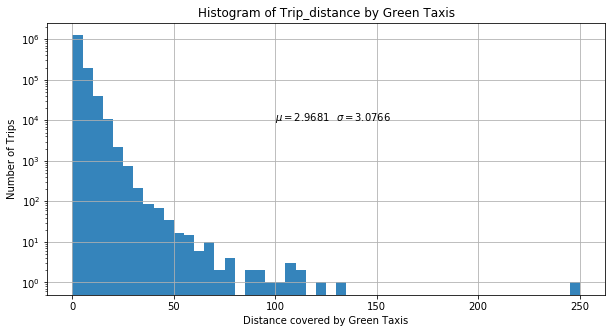

In [52]:
%matplotlib inline
def plotHist(trip_distance, xlabel, ylabel, title, showMu=True):
    """
    Function to plot histogram of Trip_distance by green taxis
    
    :param trip_distance : A pandas series of float values
    :param title         : String. This variable sets the title of the plot
    :param showMu        : Boolean. This tells the function whether to show mean value on the plot or not.
    :return              : None
    """    
    mean = "%.4f"%trip_distance.mean()
    std_dev = "%.4f"%trip_distance.std()
    plt.figure(figsize=(10,5))
    plt.yscale("log")
    plt.xlabel("{0}".format(xlabel))
    plt.ylabel("{0}".format(ylabel))
    plt.title("{0}".format(title))
    plt.hist(trip_distance, 50, alpha = 0.9,range=(0,250))
    if showMu:
        plt.text(100, 10**4, r'$\mu = {0}$'.format(mean))
        plt.text(130, 10**4, r'$\sigma = {0}$'.format(std_dev))
    plt.grid(True)
    plt.show()
    
plotHist(df['Trip_distance'], X_LABEL_HIST, Y_LABEL_HIST, TITLE_HIST)

Our assumption was correct. The data is skewed. Its skewed towards right. This suggests that <strong>commuters tends to hire taxis for wide range of distances</strong>. There are exceptions when taxis make trip for distance > 200 miles. 

The varied range of distance trip by the green taxi in new york might be because:
    * Commuters at the periphery of he New York City tends to commute to places like offices, residential homes in 

In [35]:
df['Trip_distance'].mean()

2.9681408511190512